<a href="https://colab.research.google.com/github/maria192001/SemanaTec/blob/main/Act6_Regresio%CC%81n_Lineal_A00827374.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

- **Nombre**: María Paula García García
- **Matrícula**: A00827374

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd 'drive/MyDrive/ST_herramientas: arte-analitica-main'

/content/drive/MyDrive/ST_herramientas: arte-analitica-main


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

presion_df = pd.read_csv('data/presion.csv')
presion_df.head(4)

,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


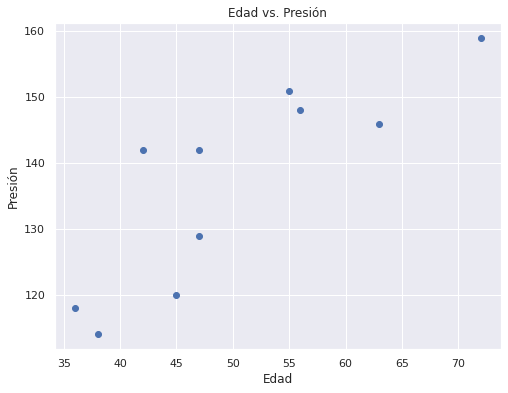

In [19]:
fig = plt.figure(figsize=(8, 6))
x = presion_df['edad']
y = presion_df['presion']
plt.title('Edad vs. Presión')
plt.ylabel('Presión')
plt.xlabel('Edad')
plt.scatter(x, y);

3. Genera una regresión logistica para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
print("Model slope (a):    ", model.coef_[0])
print("Model intercept (b):", model.intercept_)

Model slope (a):     1.1483331897665603
Model intercept (b): 79.36850719269533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


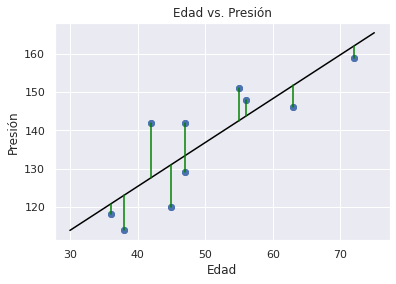

In [20]:
xfit = np.linspace(30, 75, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.title('Fabricantes')
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.title('Edad vs. Presión')
plt.ylabel('Presión')
plt.xlabel('Edad')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular= 76
def presion(edad):
  return model.coef_[0]*edad + model.intercept_

presion(edad_calcular)

166.6418296149539

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
negocio_df = pd.read_csv('data/AdvmiNegocio.csv')
negocio_df = negocio_df.iloc[:, 1::]
negocio_df.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


Text(0.5, 1.0, 'Relación inversión tv y ventas')

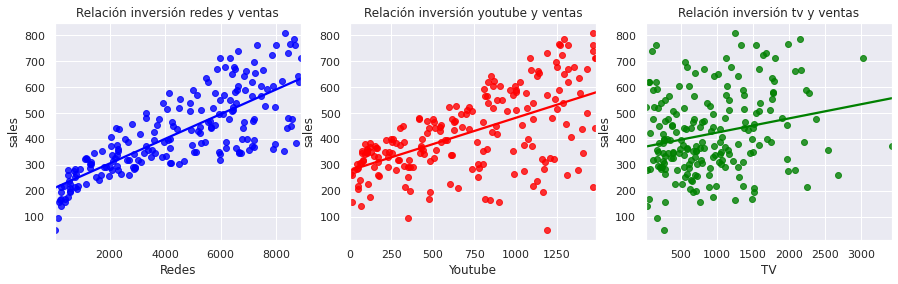

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
# Redes
sns.regplot(data=negocio_df, x='Redes',y='sales', ax=axs[0], ci=None, color='blue')
axs[0].set_title("Relación inversión redes y ventas")
# Youtube
sns.regplot(data=negocio_df, x='Youtube',y='sales', ax=axs[1], color='red', ci=None)
axs[1].set_title("Relación inversión youtube y ventas")
# TV
sns.regplot(data=negocio_df, x='TV',y='sales', ax=axs[2], color='green', ci=None)
axs[2].set_title("Relación inversión tv y ventas")

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Se puede obtener lo siguiente:
* Las ventas incrementan proporcionalmente con el presupuesto que se se le invierte a las redes.
* Las ventas igual incrementan con el presupuesto de Youtube, sin embargo existe más variación. 
* La relación presupuesto de TV-ventas es muy difusa.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:
from sklearn.linear_model import LinearRegression

# Redes
lm1 = LinearRegression()
lm1.fit(negocio_df[['Redes']], negocio_df['sales'])
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(negocio_df[['Redes']], negocio_df['sales']), '\n')

# Youtube
lm2 = LinearRegression()
lm2.fit(negocio_df[['Youtube']], negocio_df['sales'])
print('Youtube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(negocio_df[['Youtube']], negocio_df['sales']), '\n')

# TV
lm3 = LinearRegression()
lm3.fit(negocio_df[['TV']], negocio_df['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(negocio_df[['TV']], negocio_df['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?


El mejor score es el de Redes, siendo el segundo mejor el correspondiente a Youtube y el peor aquel de TV.

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [ ]:
# Definimos una función para calcular R^2.
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
# Vamos a comparar los modelos nuevamente con R2 ajustada
# Redes  y Youtube
print('Redes y Youtube')
lm4 = LinearRegression()
lm4.fit(negocio_df[['Redes', 'Youtube']], negocio_df['sales'])
print('beta_0: ', lm4.intercept_)
print('beta_1: ', lm4.coef_[0])
print('beta_2 ',lm4.coef_[1])
print('Score: ', lm4.score(negocio_df[['Redes', 'Youtube']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes', 'Youtube']], negocio_df['sales'], lm4), '\n')

# Redes y TV
print('Redes y TV')
lm5 = LinearRegression()
lm5.fit(negocio_df[['Redes','TV']], negocio_df['sales'])
print('beta_0: ', lm5.intercept_)
print('beta_1: ', lm5.coef_[0])
print('beta_2: ', lm5.coef_[1])
print('Score: ', lm5.score(negocio_df[['Redes','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes', 'TV']], negocio_df['sales'], lm5), '\n')

# Youtube y TV
print('Youtube y TV')
lm6 = LinearRegression()
lm6.fit(negocio_df[['Youtube','TV']], negocio_df['sales'])
print('beta_0: ', lm6.intercept_)
print('beta_1: ', lm6.coef_[0])
print('beta_2: ', lm6.coef_[1])
print('Score: ', lm6.score(negocio_df[['Youtube','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Youtube', 'TV']], negocio_df['sales'], lm6), '\n')

# Comparar el modelo con las tres variables
lm7 = LinearRegression()
lm7.fit(negocio_df[['Redes','Youtube','TV']], negocio_df['sales'])
print('Redes, Youtube y TV')
print('beta_0: ', lm7.intercept_)
print('beta_1: ', lm7.coef_[0])
print('beta_2: ', lm7.coef_[1])
print('Score: ', lm7.score(negocio_df[['Redes','Youtube','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes','Youtube', 'TV']], negocio_df['sales'], lm7))

Redes y Youtube
beta_0:  87.63299737215414
beta_1:  0.045754815101076145
beta_2  0.1879942266203092
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
beta_1:  0.04690121389190708
beta_2:  0.04421942424519284
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
beta_1:  0.19904459389696902
beta_2:  0.006644174523281712
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

Redes, Youtube y TV
beta_0:  88.16668108378224
beta_1:  0.045764645455397615
beta_2:  0.1885300169182045
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

Aunque el score simple es mayor en el caso de los 3 medios juntos, el score ajustado en el caso de Redes y Youtube es mayor, ya que el score ajustado es el que más se parece a la realidad en el caso de más de una variable, y mientras mayor sea este porcentaje de variabilidad mejor es el modelo, podemos concluir que el modelo que nos conviene elegir es aquel de Redes y Youtube.